In [1]:
%matplotlib inline

import sys
sys.path.append('../')

In [6]:
from matplotlib import pyplot as plt
from src.data_analysis.analysis_helpers import get_run_ids, get_labeledSamples_avgAcc, get_out_dirs
%matplotlib inline
# %pylab

import sys
import glob
sys.path.append('../')

from mlflow.tracking import MlflowClient
from src.database.mlflow import MLFlowClient
db = MLFlowClient(tracking_uri="http://mlflow.dbs.ifi.lmu.de:5000/", experiment_name="DMBAL")
tracking = MlflowClient()

runs_margin = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.number_clusters","params.max_epochs", "params.learning_rate", "params.optimizer"],[True, True, True, True, True, True, True],["centroids", "margin", "kmeans",1000, 30, 0.01, "Adam"])
print(len(runs_margin))
run_ids_margin = get_run_ids(runs_margin)

10


In [7]:
runs_least = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["centroids", "least_confident", "kmeans", 30, 0.01, 1000])
print(len(runs_least))
run_ids_least = get_run_ids(runs_least)

10


In [8]:
runs_entropy = db.get_entries(['params.diversity_strategy', "params.uncertainty", "params.clustering", "params.max_epochs", "params.learning_rate", "params.number_clusters"],[True, True, True, True, True, True],["centroids", "entropy", "kmeans", 30, 0.01, 1000])
print(len(runs_entropy))
run_ids_entropy = get_run_ids(runs_entropy)

10


In [9]:
samples_labeled_margin, avg_accs_margin = get_labeledSamples_avgAcc(run_ids_margin, tracking)
samples_labeled_least, avg_accs_least = get_labeledSamples_avgAcc(run_ids_least, tracking)
samples_labeled_entropy, avg_accs_entropy = get_labeledSamples_avgAcc(run_ids_entropy, tracking)

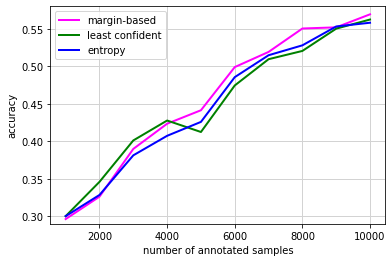

In [10]:
# plot
plt.plot(samples_labeled_margin, avg_accs_margin,color='magenta', label='margin-based', linewidth=2)
plt.plot(samples_labeled_least, avg_accs_least,color='green', label='least confident', linewidth=2)
plt.plot(samples_labeled_entropy, avg_accs_entropy,color='blue', label='entropy', linewidth=2)
plt.legend()
plt.xlabel('number of annotated samples')
plt.ylabel('accuracy')
plt.grid(b=True, color='lightgrey', linestyle='-', linewidth=1)
plt.ylim([0.29, 0.58])

plt.show()

In [11]:
avg_accs_margin

array([0.29632, 0.32619, 0.38987, 0.4235 , 0.44144, 0.499  , 0.51924,
       0.55047, 0.55201, 0.56939])

In [12]:
avg_accs_least

array([0.30021, 0.34596, 0.40118, 0.42774, 0.41244, 0.4745 , 0.50954,
       0.52056, 0.55029, 0.56244])

In [13]:
avg_accs_entropy

array([0.30021, 0.32848, 0.38132, 0.40736, 0.42591, 0.48559, 0.51482,
       0.52803, 0.55319, 0.55817])